In [65]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
"""The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables."""
"""Problem statement: predicting turbine energy yield (TEY) using ambient variables as features."""

'Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.'

In [67]:
# Load the dataset using pandas
data = pd.read_csv("E:\\Neural Networks\\gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


<AxesSubplot: >

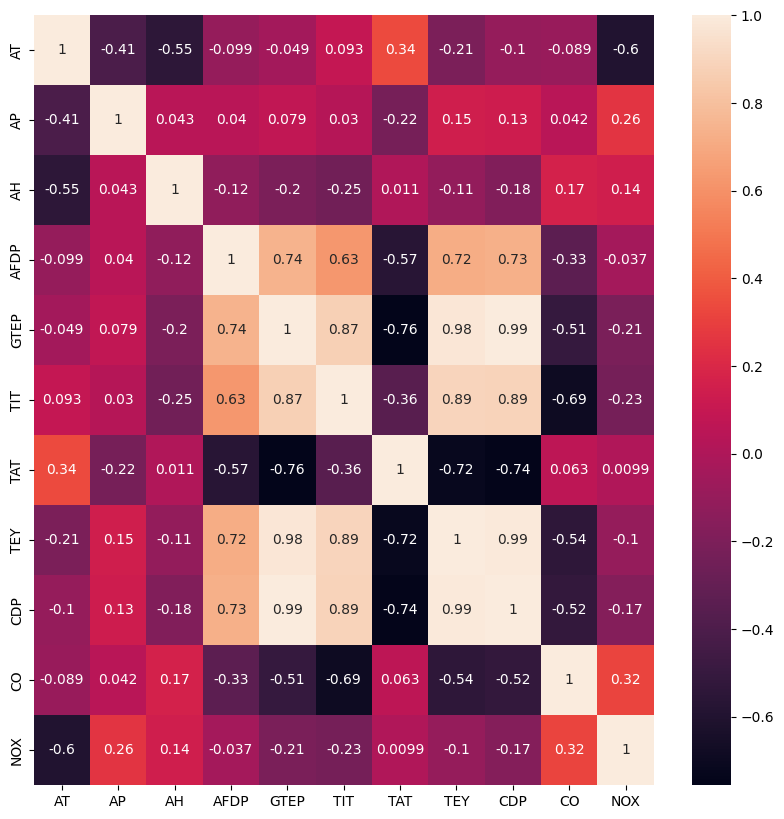

In [68]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


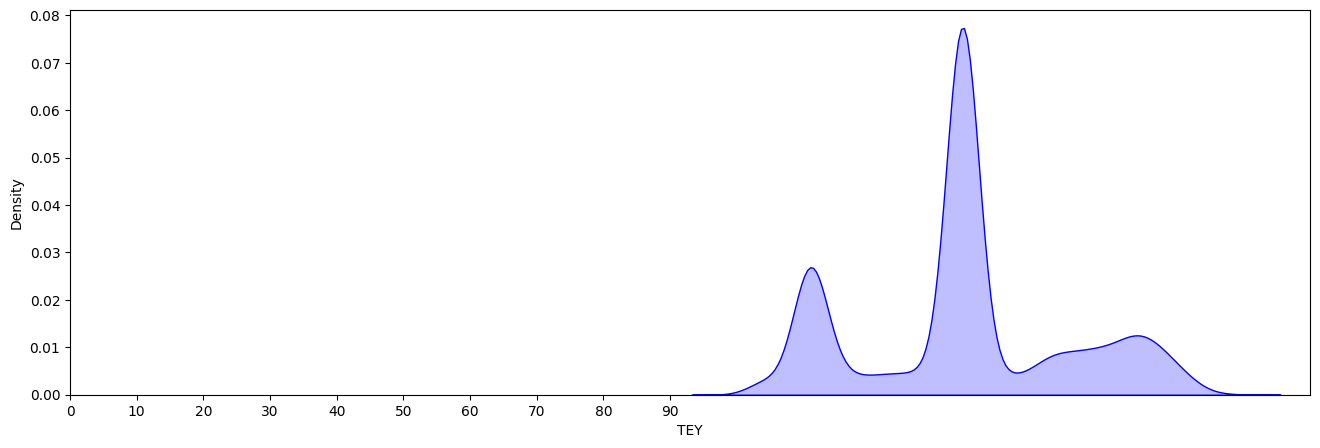

In [69]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['TEY'].skew()))
print("Kurtosis: {}".format(data['TEY'].kurtosis()))
ax = sns.kdeplot(data['TEY'],shade=True,color='b')
plt.xticks([i for i in range(0,100,10)])
plt.show()

In [70]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()

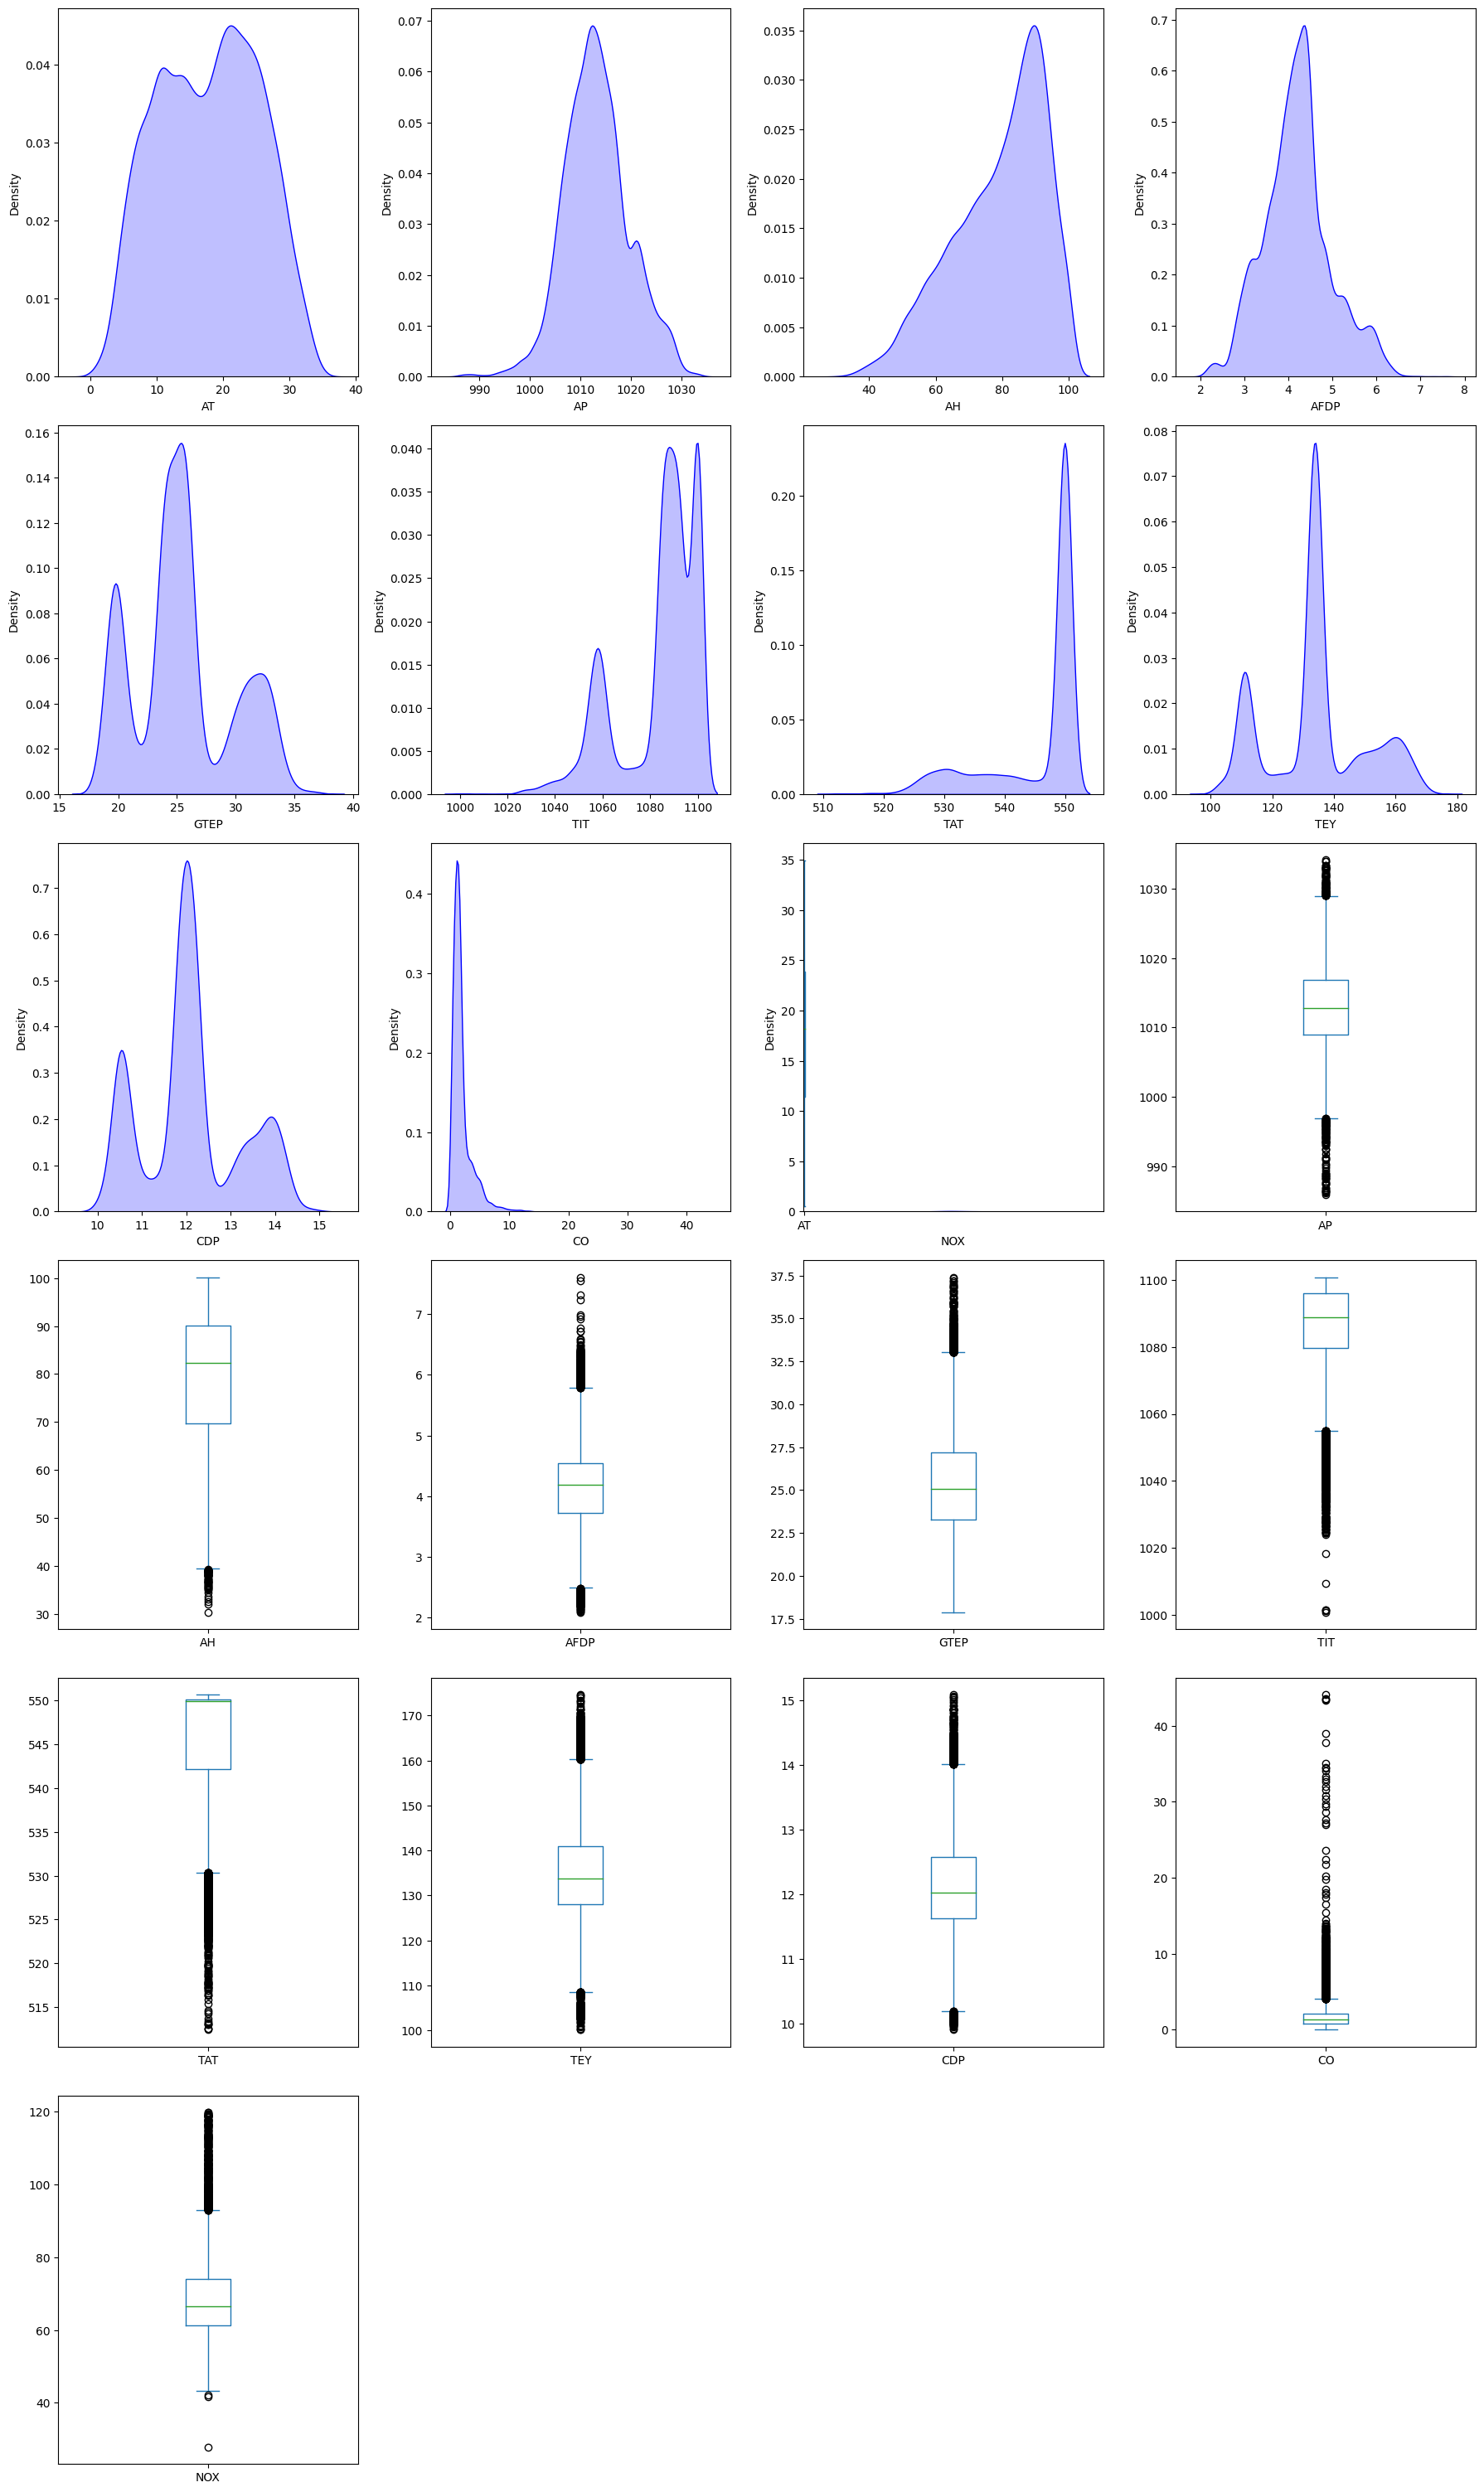

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


In [71]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [72]:
x = data.drop(labels='TEY',axis=1)
y = data['TEY']

In [73]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [74]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [75]:
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
scaled_x = stdsclr.fit_transform(x)

In [76]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [77]:
ann = models.Sequential([
      layers.Dense(20,input_dim=10,activation = 'relu'),
      layers.Dense(40,activation = 'relu'),
      layers.Dense(1,activation = 'linear')
    
])

In [78]:
ann.compile(optimizer='adam',loss='mse',metrics=["mse","mae"])

In [79]:
ann.fit(x,y,batch_size=100,epochs=300)

Epoch 1/300
151/151 [==============================] - 1s 1ms/step - loss: 136.5929 - mse: 136.5929 - mae: 8.8510
Epoch 2/300
151/151 [==============================] - 0s 1ms/step - loss: 47.3211 - mse: 47.3211 - mae: 5.1749
Epoch 3/300
151/151 [==============================] - 0s 1ms/step - loss: 10.6318 - mse: 10.6318 - mae: 2.4502
Epoch 4/300
151/151 [==============================] - 0s 1ms/step - loss: 3.1991 - mse: 3.1991 - mae: 1.2719
Epoch 5/300
151/151 [==============================] - 0s 1ms/step - loss: 2.3715 - mse: 2.3715 - mae: 1.1116
Epoch 6/300
151/151 [==============================] - 0s 1ms/step - loss: 1.8310 - mse: 1.8310 - mae: 0.9503
Epoch 7/300
151/151 [==============================] - 0s 1ms/step - loss: 1.7250 - mse: 1.7250 - mae: 0.9457
Epoch 8/300
151/151 [==============================] - 0s 1ms/step - loss: 1.5786 - mse: 1.5786 - mae: 0.9317
Epoch 9/300
151/151 [==============================] - 0s 1ms/step - loss: 1.4453 - mse: 1.4453 - mae: 0.8983
Ep

In [80]:
ann.evaluate(x,y)

470/470 [==============================] - 1s 1ms/step - loss: 1.7716 - mse: 1.7716 - mae: 1.1730


[1.7715553045272827, 1.7715553045272827, 1.173010230064392]